# Scenario A - Noise Level Variation (results evaluation)

This file is used to evaluate the inference (numerical) results.

The model used in the inference of the parameters is formulated as follows: 

\begin{equation}
\large y = f(x) = \sum\limits_{m=1}^M \big[A_m \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}\big] + \epsilon
\end{equation}

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.8


## Load results summary

In [114]:
# load results from disk
df = pd.read_csv('./output_mruns_adapt_diag/scenario_noise.csv')
df.index += 1
#df.sort_values(by=['waic'], ascending=False)
df

,r_hat,mcse,ess,bfmi,r2,waic,epsilon,epsilon_real,run
1,1.000,0.0000,4666.8,1.070613,0.999764,-4682.815096,0.050653,0.05,run_1
2,1.000,0.0000,4492.0,1.018099,0.999381,-2156.797809,0.117157,0.10,run_1
3,1.108,0.1073,682.6,0.967143,0.999696,-4698.906496,0.050396,0.25,run_1
4,1.000,0.0000,4357.5,1.024266,0.999763,-4682.477654,0.050639,0.05,run_2
5,1.000,0.0000,4395.9,1.029305,0.999382,-2155.010993,0.117171,0.10,run_2
6,1.004,0.0064,1496.8,0.970603,0.999697,-4698.840584,0.050411,0.25,run_2
7,1.000,0.0000,3959.4,1.042734,0.999765,-4682.675816,0.050635,0.05,run_3
8,1.000,0.0000,4587.1,1.033986,0.999378,-2157.045066,0.117173,0.10,run_3
9,1.001,0.0050,1148.7,0.969120,0.999694,-4699.343310,0.050414,0.25,run_3


In [113]:
suc = df.loc[(df['r_hat'] <= 1.1) & (df['r2'] >= 0.99) & (df['run'] == 'run_3')]
suc

,r_hat,mcse,ess,bfmi,r2,waic,epsilon,epsilon_real,run
7,1.000,0.000,3959.4,1.042734,0.999765,-4682.675816,0.050635,0.05,run_3
8,1.000,0.000,4587.1,1.033986,0.999378,-2157.045066,0.117173,0.10,run_3
9,1.001,0.005,1148.7,0.969120,0.999694,-4699.343310,0.050414,0.25,run_3


In [50]:
len(suc)

1

In [51]:
len(df.loc[(df['r_hat'] > 1.1)])

21

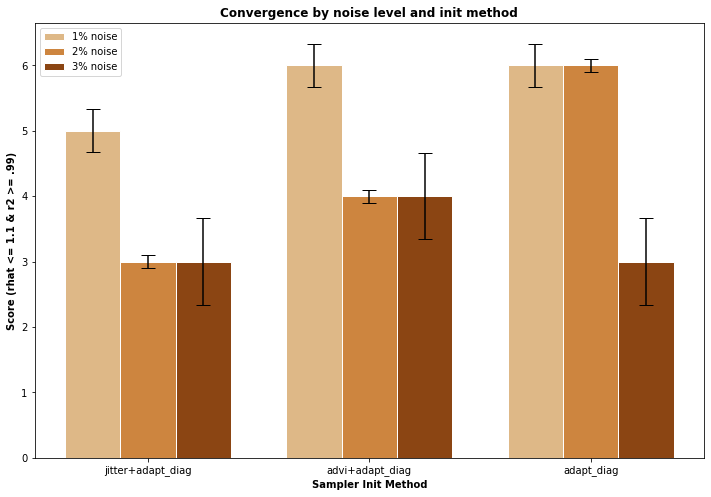

In [107]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.ylabel('Score (rhat <= 1.1 & r2 >= .99)', fontweight='bold')
plt.title('Convergence by noise level and init method', fontweight='bold')

# set width of bar
barWidth = 0.25

# set height of bar
bars1 = [5, 6, 6]
bars2 = [3, 4, 6]
bars3 = [3, 4, 3]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

caps = 7

# Make the plot
plt.bar(r1, bars1, yerr=0.33, capsize=caps, color='burlywood', width=barWidth, 
        edgecolor='white', label='1% noise')
plt.bar(r2, bars2, yerr=0.1, capsize=caps, color='peru', width=barWidth, 
        edgecolor='white', label='2% noise')
plt.bar(r3, bars3, yerr=0.66, capsize=caps, color='saddlebrown', width=barWidth, 
        edgecolor='white', label='3% noise')

# Add xticks on the middle of the group bars
plt.xlabel('Sampler Init Method', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['jitter+adapt_diag', 'advi+adapt_diag', 'adapt_diag'])

# Create legend & Show graphic
plt.legend()
plt.show()